In [1]:
from datetime import datetime

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

import yfinance as yf

from scipy.stats import norm

In [2]:
end = datetime.now()
start = datetime(end.year-5,end.month,end.day)

In [3]:
stock_list = ['hdfc', 'icici', 'reliance', 'wipro', 'hcltech', 'cholafin', 'crompton', 'srf', 'voltas', 'tatasteel']
stock_symbols = ['HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'WIPRO.NS', 'HCLTECH.NS', 'CHOLAFIN.NS', 'CROMPTON.NS', 'SRF.NS', 'VOLTAS.NS', 'TATASTEEL.NS']

In [4]:
for stock, stock_symbol in zip(stock_list, stock_symbols):
    globals()[stock] = yf.download(stock_symbol, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
nifty_50 = yf.download("^NSEI", start, end)

nifty_50_daily = nifty_50['Close'].pct_change().dropna()
nifty_50_daily

[*********************100%***********************]  1 of 1 completed


Date
2016-06-10   -0.004090
2016-06-13   -0.007277
2016-06-14   -0.000216
2016-06-15    0.012055
2016-06-16   -0.008024
                ...   
2021-06-03    0.007328
2021-06-04   -0.001281
2021-06-07    0.005195
2021-06-08   -0.000733
2021-06-09    0.002160
Name: Close, Length: 1227, dtype: float64

In [6]:
hdfc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-09,581.250000,582.099976,576.250000,579.700012,562.801941,2324092
2016-06-10,579.200012,586.349976,578.099976,580.674988,563.748535,3161156
2016-06-13,577.375000,582.474976,575.525024,576.450012,559.646667,1661618
2016-06-14,577.500000,578.500000,572.125000,575.924988,559.136963,1914384
2016-06-15,577.500000,585.450012,576.599976,584.775024,567.729065,1522912
...,...,...,...,...,...,...
2021-06-03,1508.000000,1524.949951,1487.750000,1520.550049,1520.550049,5143630
2021-06-04,1516.000000,1520.650024,1499.199951,1500.949951,1500.949951,4712238
2021-06-07,1510.000000,1514.000000,1496.000000,1499.849976,1499.849976,4045834


In [7]:
hdfc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,1019.531250,1028.776906,1008.789511,1018.923498,1011.438171,7.048946e+06
std,249.912547,252.619245,245.922437,249.128472,253.854222,8.305093e+06
min,577.375000,578.500000,572.125000,575.924988,559.136963,2.850040e+05
25%,879.987503,888.862488,871.399994,881.981232,870.169342,2.659724e+06
50%,1026.450012,1036.325012,1014.925018,1026.825012,1020.000397,4.970139e+06
75%,1195.781281,1204.512451,1177.837463,1190.224976,1190.205658,8.954770e+06
max,1621.199951,1641.000000,1608.449951,1626.650024,1626.650024,2.011300e+08


In [8]:
hdfc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2016-06-09 to 2021-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1232 non-null   float64
 1   High       1232 non-null   float64
 2   Low        1232 non-null   float64
 3   Close      1232 non-null   float64
 4   Adj Close  1232 non-null   float64
 5   Volume     1232 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.4 KB


In [9]:
closing_df = pd.DataFrame(index=hdfc.index, columns=stock_list)

In [10]:
for stock in stock_list:
    closing_df[stock] = globals()[stock]['Close']

In [11]:
closing_df

,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
Date,,,,,,,,,,
2016-06-09,579.700012,231.409088,481.015442,204.300049,376.524994,198.750000,133.550003,1268.800049,334.850006,325.883575
2016-06-10,580.674988,229.636368,483.764404,204.506302,375.524994,195.860001,133.500000,1250.250000,327.049988,318.595123
2016-06-13,576.450012,221.590912,485.943726,202.950043,376.825012,191.880005,133.250000,1299.400024,322.649994,307.829193
2016-06-14,575.924988,222.681824,483.541504,203.662552,376.200012,189.910004,136.550003,1262.300049,330.049988,309.591766
2016-06-15,584.775024,225.409088,487.677307,205.143799,377.600006,184.639999,135.050003,1284.349976,330.350006,314.641266
...,...,...,...,...,...,...,...,...,...,...
2021-06-03,1520.550049,650.250000,2209.649902,539.049988,939.450012,569.650024,410.000000,6586.250000,1111.550049,1122.000000
2021-06-04,1500.949951,642.700012,2190.500000,541.200012,936.549988,570.700012,400.049988,6623.450195,1104.449951,1120.699951
2021-06-07,1499.849976,648.200012,2227.399902,548.250000,949.599976,580.099976,407.049988,6686.250000,1096.800049,1128.699951


In [12]:
daily_ret = closing_df.pct_change()
daily_ret = daily_ret.dropna()
daily_ret

,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
Date,,,,,,,,,,
2016-06-10,0.001682,-0.007661,0.005715,0.001010,-0.002656,-0.014541,-0.000374,-0.014620,-0.023294,-0.022365
2016-06-13,-0.007276,-0.035036,0.004505,-0.007610,0.003462,-0.020321,-0.001873,0.039312,-0.013454,-0.033792
2016-06-14,-0.000911,0.004923,-0.004943,0.003511,-0.001659,-0.010267,0.024766,-0.028552,0.022935,0.005726
2016-06-15,0.015367,0.012247,0.008553,0.007273,0.003721,-0.027750,-0.010985,0.017468,0.000909,0.016310
2016-06-16,-0.006327,-0.035894,-0.008430,0.005210,-0.004635,-0.002870,-0.014809,-0.016351,-0.020887,0.000757
...,...,...,...,...,...,...,...,...,...,...
2021-06-03,0.011004,0.002931,0.003816,-0.007274,-0.004556,0.022160,0.022699,0.008792,0.074584,-0.001824
2021-06-04,-0.012890,-0.011611,-0.008666,0.003989,-0.003087,0.001843,-0.024268,0.005648,-0.006388,-0.001159
2021-06-07,-0.000733,0.008558,0.016845,0.013027,0.013934,0.016471,0.017498,0.009481,-0.006926,0.007138


In [13]:
volatility_df = daily_ret.rolling(window=252).std() * np.sqrt(252)
volatility_df

,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
Date,,,,,,,,,,
2016-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-06-03,0.296082,0.379579,0.307405,0.347197,0.301111,0.506308,0.352454,0.311692,0.308693,0.409960
2021-06-04,0.296218,0.379080,0.307461,0.347197,0.301155,0.505277,0.350809,0.311551,0.307351,0.409934
2021-06-07,0.295584,0.378509,0.307831,0.346426,0.301373,0.505047,0.350972,0.311456,0.307127,0.409773


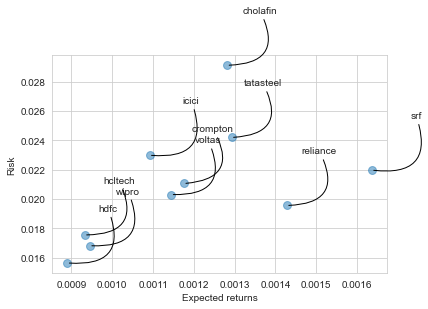

In [14]:
area = np.pi*20

plt.scatter(daily_ret.mean(), daily_ret.std(),alpha = 0.5,s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(daily_ret.columns, daily_ret.mean(), daily_ret.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.8', color = 'black'))

<AxesSubplot:xlabel='Date'>

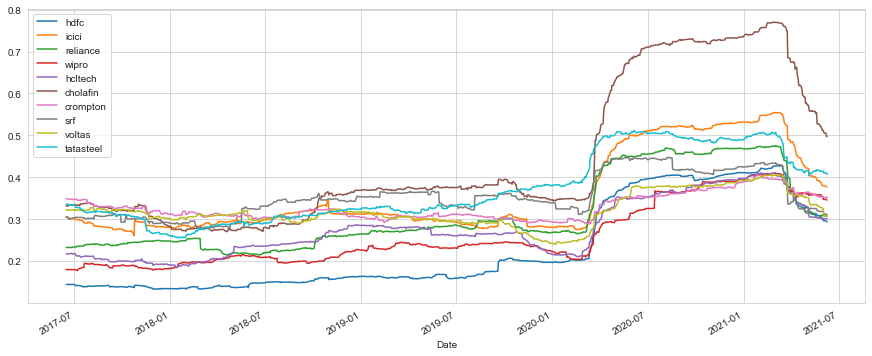

In [15]:
volatility_df.plot(figsize=(15, 6))

In [16]:
expected_returns = pd.Series(daily_ret.mean(), index=stock_list, name='Returns')
expected_returns

hdfc         0.000890
icici        0.001091
reliance     0.001428
wipro        0.000945
hcltech      0.000933
cholafin     0.001282
crompton     0.001176
srf          0.001636
voltas       0.001145
tatasteel    0.001293
Name: Returns, dtype: float64

In [17]:
expected_volatility = pd.Series(daily_ret.std(), index=stock_list, name='Volatility')
expected_volatility

hdfc         0.015642
icici        0.022987
reliance     0.019560
wipro        0.016816
hcltech      0.017550
cholafin     0.029120
crompton     0.021058
srf          0.021971
voltas       0.020304
tatasteel    0.024199
Name: Volatility, dtype: float64

In [18]:
stock_df = pd.merge(expected_returns, expected_volatility, right_index = True, left_index = True)
stock_df

,Returns,Volatility
hdfc,0.000890,0.015642
icici,0.001091,0.022987
reliance,0.001428,0.019560
wipro,0.000945,0.016816
hcltech,0.000933,0.017550
cholafin,0.001282,0.029120
crompton,0.001176,0.021058
srf,0.001636,0.021971
voltas,0.001145,0.020304
tatasteel,0.001293,0.024199


In [19]:
cov_matrix = daily_ret.cov()
cov_matrix

,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
hdfc,0.000245,0.000194,0.000122,0.000057,0.000061,0.000199,0.000074,0.000103,0.000114,0.000142
icici,0.000194,0.000528,0.000163,0.000084,0.000079,0.000318,0.000112,0.000177,0.000174,0.000250
reliance,0.000122,0.000163,0.000383,0.000076,0.000093,0.000166,0.000070,0.000128,0.000122,0.000160
wipro,0.000057,0.000084,0.000076,0.000283,0.000144,0.000099,0.000060,0.000077,0.000076,0.000095
hcltech,0.000061,0.000079,0.000093,0.000144,0.000308,0.000096,0.000062,0.000094,0.000081,0.000099
cholafin,0.000199,0.000318,0.000166,0.000099,0.000096,0.000848,0.000167,0.000217,0.000242,0.000273
crompton,0.000074,0.000112,0.000070,0.000060,0.000062,0.000167,0.000443,0.000105,0.000117,0.000105
srf,0.000103,0.000177,0.000128,0.000077,0.000094,0.000217,0.000105,0.000483,0.000172,0.000192
voltas,0.000114,0.000174,0.000122,0.000076,0.000081,0.000242,0.000117,0.000172,0.000412,0.000204
tatasteel,0.000142,0.000250,0.000160,0.000095,0.000099,0.000273,0.000105,0.000192,0.000204,0.000586


In [20]:
corr_stock = daily_ret.copy()
corr_stock['nifty_50'] = nifty_50_daily
corr_stock

,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel,nifty_50
Date,,,,,,,,,,,
2016-06-10,0.001682,-0.007661,0.005715,0.001010,-0.002656,-0.014541,-0.000374,-0.014620,-0.023294,-0.022365,-0.004090
2016-06-13,-0.007276,-0.035036,0.004505,-0.007610,0.003462,-0.020321,-0.001873,0.039312,-0.013454,-0.033792,-0.007277
2016-06-14,-0.000911,0.004923,-0.004943,0.003511,-0.001659,-0.010267,0.024766,-0.028552,0.022935,0.005726,-0.000216
2016-06-15,0.015367,0.012247,0.008553,0.007273,0.003721,-0.027750,-0.010985,0.017468,0.000909,0.016310,0.012055
2016-06-16,-0.006327,-0.035894,-0.008430,0.005210,-0.004635,-0.002870,-0.014809,-0.016351,-0.020887,0.000757,-0.008024
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-03,0.011004,0.002931,0.003816,-0.007274,-0.004556,0.022160,0.022699,0.008792,0.074584,-0.001824,0.007328
2021-06-04,-0.012890,-0.011611,-0.008666,0.003989,-0.003087,0.001843,-0.024268,0.005648,-0.006388,-0.001159,-0.001281
2021-06-07,-0.000733,0.008558,0.016845,0.013027,0.013934,0.016471,0.017498,0.009481,-0.006926,0.007138,0.005195


In [21]:
corr_df = corr_stock.corr(method='pearson')
corr_df

,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel,nifty_50
hdfc,1.000000,0.538479,0.398278,0.215973,0.221859,0.437255,0.224633,0.301025,0.357718,0.376221,0.757335
icici,0.538479,1.000000,0.362512,0.217692,0.195298,0.474649,0.230460,0.350835,0.371955,0.448695,0.731593
reliance,0.398278,0.362512,1.000000,0.229642,0.270178,0.290579,0.169118,0.296708,0.307445,0.337164,0.637991
wipro,0.215973,0.217692,0.229642,1.000000,0.486867,0.201625,0.170403,0.208354,0.221376,0.232832,0.408501
hcltech,0.221859,0.195298,0.270178,0.486867,1.000000,0.187643,0.167540,0.243366,0.227022,0.233848,0.435115
cholafin,0.437255,0.474649,0.290579,0.201625,0.187643,1.000000,0.272442,0.339597,0.409548,0.387957,0.584445
crompton,0.224633,0.230460,0.169118,0.170403,0.167540,0.272442,1.000000,0.227093,0.273000,0.206186,0.327146
srf,0.301025,0.350835,0.296708,0.208354,0.243366,0.339597,0.227093,1.000000,0.385219,0.361228,0.509935
voltas,0.357718,0.371955,0.307445,0.221376,0.227022,0.409548,0.273000,0.385219,1.000000,0.414689,0.526792
tatasteel,0.376221,0.448695,0.337164,0.232832,0.233848,0.387957,0.206186,0.361228,0.414689,1.000000,0.607019


In [22]:
# Beta => Covariance / Variance    OR    (Correlation * Stock_STD) / StandardMarket_STD

stock_beta = pd.Series(index=stock_list)
nifty_std = corr_stock['nifty_50'].std()

for stock in stock_list:
    stock_beta[stock] = (corr_df['nifty_50'][stock] * corr_stock[stock].std()) / nifty_std

<ipython-input-22-50f238797346>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stock_beta = pd.Series(index=stock_list)


In [23]:
stock_beta

hdfc         1.022232
icici        1.451210
reliance     1.076880
wipro        0.592794
hcltech      0.658954
cholafin     1.468666
crompton     0.594480
srf          0.966842
voltas       0.923018
tatasteel    1.267617
dtype: float64

In [24]:
# Monte Carlo

runs = 50000
results = np.zeros((7+len(stock_list),runs))
risk_free_rate = 0.0602
alpha = 0.01
days = 252
market_return = nifty_50_daily.mean() * days 

for i in range(runs):
    
    pb = 0
    
    weights = np.random.random(10)
    weights /= np.sum(weights)

    portfolio_return = np.sum(daily_ret.mean()*weights) * days
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(days)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    # SHARPE RATIO => (portfolio_return - risk_free_rate) / volatility
    results[2,i] = (results[0,i] - risk_free_rate) / results[1,i]
    
    # VaR => return - (Z * volatility)
    results[3,i] = abs(portfolio_return - (portfolio_std_dev * norm.ppf(1 - alpha)))  # ppf => inverse of cdf
    
    for j in range(len(weights)):
        results[j+7,i] = weights[j]
        pb += weights[j] * stock_beta [j]
        
    # PORTFOLIO BETA => sum(weight * beta)
    results[4,i] = pb
    
    # TREYNOR RATIO => (portfolio_return - risk_free_rate) / portfolio_beta
    results[5,i] = (results[0,i] - risk_free_rate) / results[4,i]
    
    # JENSEN ALPHA => portfolio_return - (risk_free_rate + portfolio_beta * (market_return - risk_free_rate))
    results[6,i] = results[0,i] - (risk_free_rate + results[4,i] * (market_return - risk_free_rate))

In [25]:
a = ['Return','Volatility','Sharpe Ratio', 'VaR', 'Portfolio Beta', 'Treynor Ratio', 'Jensen Alpha']+stock_list
results = pd.DataFrame(results.T, columns=a)

In [26]:
results.describe()

,Return,Volatility,Sharpe Ratio,VaR,Portfolio Beta,Treynor Ratio,Jensen Alpha,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,50000.000000
mean,0.297769,0.210161,1.132397,0.191139,1.001879,0.237744,0.146186,0.099714,0.099966,0.100125,0.100481,0.100358,9.990811e-02,1.000763e-01,0.099878,9.957658e-02,0.099917
std,0.010808,0.011330,0.058689,0.023589,0.059024,0.014731,0.010392,0.057327,0.057241,0.057390,0.057559,0.057209,5.761122e-02,5.744381e-02,0.057547,5.762764e-02,0.057397
min,0.254627,0.179424,0.851046,0.132649,0.754936,0.182561,0.102677,0.000001,0.000010,0.000006,0.000002,0.000004,1.193087e-07,4.348307e-07,0.000005,2.703911e-07,0.000002
25%,0.290543,0.202117,1.093782,0.174345,0.962663,0.227636,0.139058,0.052276,0.053244,0.052705,0.052875,0.053664,5.244742e-02,5.311501e-02,0.052354,5.205123e-02,0.052562
50%,0.297791,0.209223,1.134895,0.188819,1.001577,0.237155,0.146141,0.099698,0.099825,0.100487,0.100912,0.100814,9.976969e-02,1.004183e-01,0.099907,9.948109e-02,0.100075
75%,0.304950,0.217119,1.173437,0.205482,1.040942,0.247261,0.153176,0.142968,0.142636,0.143238,0.143706,0.143492,1.432215e-01,1.427504e-01,0.142860,1.427908e-01,0.143045
max,0.351528,0.273472,1.318236,0.330010,1.263013,0.305135,0.192133,0.346215,0.359323,0.416048,0.373250,0.377474,3.930661e-01,4.043623e-01,0.380420,4.631773e-01,0.364740


In [27]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Return          50000 non-null  float64
 1   Volatility      50000 non-null  float64
 2   Sharpe Ratio    50000 non-null  float64
 3   VaR             50000 non-null  float64
 4   Portfolio Beta  50000 non-null  float64
 5   Treynor Ratio   50000 non-null  float64
 6   Jensen Alpha    50000 non-null  float64
 7   hdfc            50000 non-null  float64
 8   icici           50000 non-null  float64
 9   reliance        50000 non-null  float64
 10  wipro           50000 non-null  float64
 11  hcltech         50000 non-null  float64
 12  cholafin        50000 non-null  float64
 13  crompton        50000 non-null  float64
 14  srf             50000 non-null  float64
 15  voltas          50000 non-null  float64
 16  tatasteel       50000 non-null  float64
dtypes: float64(17)
memory usage: 6.

In [28]:
results

,Return,Volatility,Sharpe Ratio,VaR,Portfolio Beta,Treynor Ratio,Jensen Alpha,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
0,0.318834,0.216298,1.195730,0.184351,1.042892,0.247997,0.163511,0.092772,0.132579,0.155151,0.019266,0.052481,0.011237,0.051614,0.208709,0.163973,0.112219
1,0.286680,0.201202,1.125632,0.181387,0.924684,0.244927,0.142138,0.035204,0.191210,0.017042,0.095520,0.192437,0.034850,0.154000,0.114147,0.155460,0.010130
2,0.314332,0.217980,1.165848,0.192766,1.005398,0.252767,0.162428,0.122960,0.150972,0.043059,0.049173,0.022208,0.029346,0.098107,0.270421,0.183911,0.029843
3,0.273998,0.203654,1.049807,0.199773,0.962919,0.222031,0.125969,0.133884,0.146428,0.059122,0.155536,0.141732,0.145114,0.163419,0.005084,0.040243,0.009440
4,0.286585,0.205061,1.103989,0.190459,0.987533,0.229243,0.136312,0.053693,0.173481,0.098327,0.218645,0.169393,0.034660,0.018002,0.079802,0.000586,0.153411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.270705,0.208336,1.010410,0.213958,0.970238,0.216962,0.122009,0.176217,0.028584,0.047023,0.159375,0.185213,0.185896,0.016897,0.004405,0.159054,0.037337
49996,0.303075,0.219372,1.107136,0.207261,1.089763,0.222869,0.143476,0.139703,0.097037,0.157859,0.011602,0.123349,0.158835,0.054471,0.084191,0.053151,0.119803
49997,0.299554,0.199740,1.198328,0.165111,0.946851,0.252790,0.152991,0.066095,0.100762,0.099738,0.106712,0.117882,0.006882,0.164466,0.106241,0.055081,0.176140
49998,0.294380,0.214909,1.089670,0.205573,1.002916,0.233499,0.142703,0.176128,0.069139,0.063260,0.078994,0.081432,0.202189,0.166830,0.107337,0.044407,0.010281


In [29]:
total_investment = 1000000

total_results = results.copy()
for stock in stock_list:
    total_results[stock] = total_investment * total_results[stock]

In [30]:
total_results

,Return,Volatility,Sharpe Ratio,VaR,Portfolio Beta,Treynor Ratio,Jensen Alpha,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
0,0.318834,0.216298,1.195730,0.184351,1.042892,0.247997,0.163511,92771.533520,132579.231639,155150.742085,19265.886529,52480.985230,11236.562725,51614.378580,208709.097496,163972.677198,112218.904997
1,0.286680,0.201202,1.125632,0.181387,0.924684,0.244927,0.142138,35204.324738,191210.275648,17042.296208,95519.917016,192436.945607,34850.376788,154000.062238,114146.621187,155459.652210,10129.528361
2,0.314332,0.217980,1.165848,0.192766,1.005398,0.252767,0.162428,122960.420058,150972.174882,43059.419471,49172.503964,22208.308552,29345.584657,98106.729659,270420.733100,183911.033023,29843.092634
3,0.273998,0.203654,1.049807,0.199773,0.962919,0.222031,0.125969,133883.915243,146428.294474,59121.531274,155535.912726,141732.014710,145113.695116,163418.556911,5083.893922,40242.544362,9439.641263
4,0.286585,0.205061,1.103989,0.190459,0.987533,0.229243,0.136312,53693.433281,173480.945776,98326.668764,218644.694724,169392.973246,34660.304809,18002.151288,79801.908679,586.116819,153410.802613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.270705,0.208336,1.010410,0.213958,0.970238,0.216962,0.122009,176216.593034,28583.793306,47023.306868,159375.100343,185212.623313,185896.041029,16897.092838,4404.535955,159054.029289,37336.884027
49996,0.303075,0.219372,1.107136,0.207261,1.089763,0.222869,0.143476,139702.889423,97036.665282,157858.584717,11601.948326,123349.057030,158835.246456,54470.897762,84190.836506,53150.866234,119803.008263
49997,0.299554,0.199740,1.198328,0.165111,0.946851,0.252790,0.152991,66095.286623,100762.418797,99737.518596,106711.913794,117882.180816,6881.888384,164466.419724,106241.313938,55081.120741,176139.938587
49998,0.294380,0.214909,1.089670,0.205573,1.002916,0.233499,0.142703,176127.677398,69139.272077,63260.385895,78994.442559,81432.419999,202189.447700,166830.397341,107337.357445,44407.486123,10281.113463


In [31]:
max_sharpe = total_results.iloc[results['Sharpe Ratio'].idxmax()]

In [32]:
min_volatility = total_results.iloc[results['Volatility'].idxmin()]

In [33]:
min_var = total_results.iloc[results['VaR'].idxmin()]

Text(0, 0.5, 'Expected Returns')

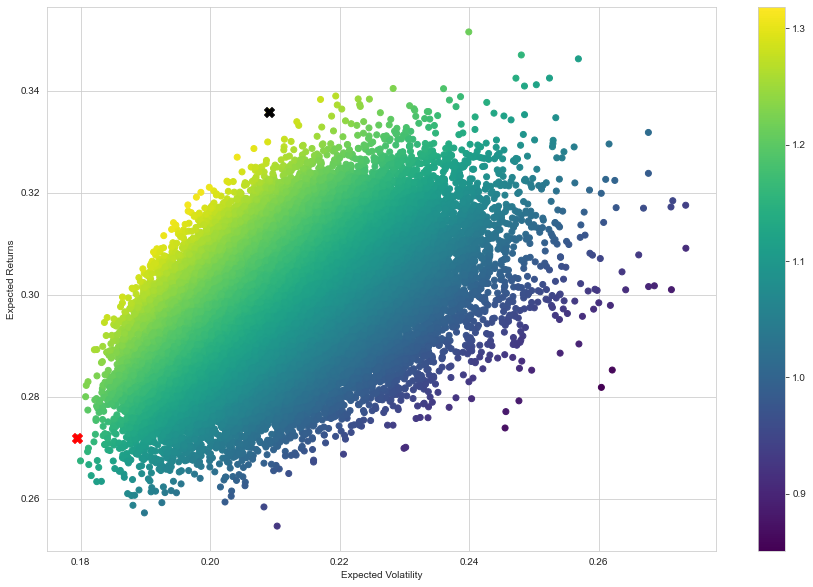

In [34]:
plt.figure(figsize=(15,10))
plt.scatter(results.Volatility, results.Return ,c=results['Sharpe Ratio'],cmap='viridis')
plt.colorbar()
plt.scatter(max_sharpe[1], max_sharpe[0], marker='X', c='black', s=100)
plt.scatter(min_volatility[1], min_volatility[0], marker='X', c='r', s=100)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')

Text(0, 0.5, 'Expected Returns')

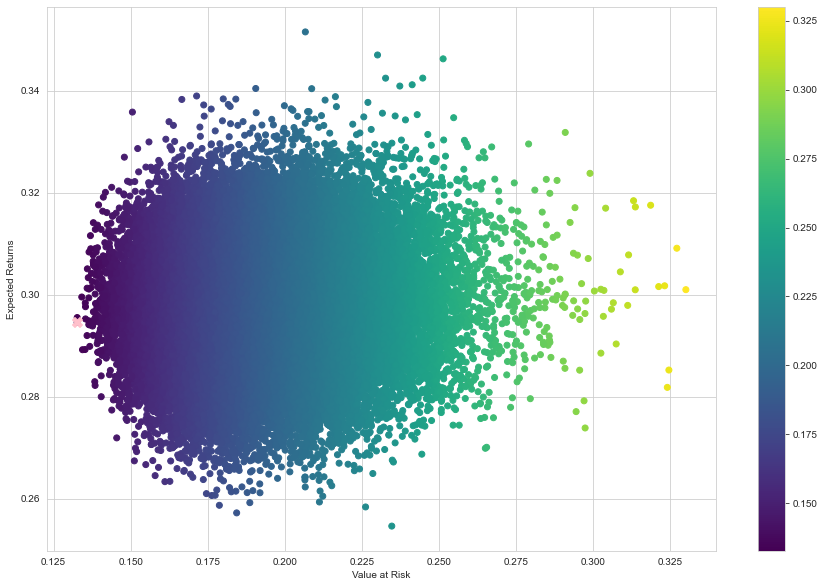

In [35]:
plt.figure(figsize=(15,10))
plt.scatter(results.VaR, results.Return ,c=results.VaR,cmap='viridis')
plt.colorbar()
plt.scatter(min_var[3], min_var[0], marker='X', c='pink', s=100)
plt.xlabel('Value at Risk')
plt.ylabel('Expected Returns')

In [36]:
max_sharpe.to_frame().T

,Return,Volatility,Sharpe Ratio,VaR,Portfolio Beta,Treynor Ratio,Jensen Alpha,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
43231,0.335808,0.209073,1.318236,0.150569,0.936446,0.294312,0.190193,27923.210253,8268.294116,247173.121959,98034.647759,57513.967478,32932.176739,126343.601719,279211.611716,43888.046835,78711.321426


In [37]:
min_volatility.to_frame().T

,Return,Volatility,Sharpe Ratio,VaR,Portfolio Beta,Treynor Ratio,Jensen Alpha,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
15881,0.271922,0.179424,1.180009,0.14548,0.81665,0.259256,0.137234,184629.553473,43156.094061,79739.44337,194155.377719,181532.620924,3834.474493,173448.383279,62099.78371,64425.588141,12978.680829


In [38]:
min_var.to_frame().T

,Return,Volatility,Sharpe Ratio,VaR,Portfolio Beta,Treynor Ratio,Jensen Alpha,hdfc,icici,reliance,wipro,hcltech,cholafin,crompton,srf,voltas,tatasteel
18117,0.294556,0.183637,1.276186,0.132649,0.844034,0.277661,0.15737,123290.855076,8618.496456,198738.687853,195820.636473,120675.595641,20204.03891,144975.776873,114846.21591,67731.661792,5098.035015


In [48]:
portfolio_1 = stock_beta[stock_beta.values>1]
portfolio_2 = stock_beta[stock_beta.values<1]

In [49]:
portfolio_1

hdfc         1.022232
icici        1.451210
reliance     1.076880
cholafin     1.468666
tatasteel    1.267617
dtype: float64

In [50]:
portfolio_2

wipro       0.592794
hcltech     0.658954
crompton    0.594480
srf         0.966842
voltas      0.923018
dtype: float64

In [58]:
portfolio_1_stock = portfolio_1.index.to_list()
portfolio_1_stock

['hdfc', 'icici', 'reliance', 'cholafin', 'tatasteel']

In [59]:
portfolio_2_stock = portfolio_2.index.to_list()
portfolio_2_stock

['wipro', 'hcltech', 'crompton', 'srf', 'voltas']

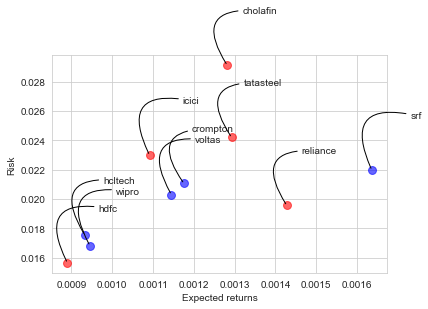

In [60]:
area = np.pi*20

plt.scatter(daily_ret[portfolio_1_stock].mean(), daily_ret[portfolio_1_stock].std(), c='r', alpha=0.6, s =area)
plt.scatter(daily_ret[portfolio_2_stock].mean(), daily_ret[portfolio_2_stock].std(), c='b', alpha=0.6, s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(daily_ret.columns, daily_ret.mean(), daily_ret.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=1', color = 'black'))